## *Задача 1. Генераторы разреженных матриц* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).

Для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод считается самым предпочтительным. Найдите, в чём недостаток предложенного метода, и покажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

In [ ]:
import sys as ss
import scipy
import numpy as np
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
x = scipy.linalg.solve(A, b)
print(A, x, sep = '\n')


In [ ]:
import sys as ss
import scipy
import numpy as np
N = 10 
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
x = scipy.linalg.solve_banded((m, m), A, b)
print(A, x, sep = '\n')

In [ ]:
import sys as ss
import scipy
import numpy as np
from scipy.sparse.linalg import spsolve
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
x = spsolve(A,b)

# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 

print(A, x, sep = '\n')


# Задача 2. Метод Якоби.


Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A$ :

$$
A=D+(A-D),
$$

в виде

$$
x_{n+1}=B x_n+c,
$$

где $B=D^{-1}(D-A)$. Найдите $c$.
Создайте случайную матрицу с диагональным доминированием. 



Вычислим $c$:
$$\begin{cases}x = A^{-1}b\\ x = Bx + c\end{cases}\Longrightarrow A^{-1}b = D^{-1}(D-A)A^{-1}b+c$$
$$c = \left[E-D^{-1}(D-A)\right]A^{-1}b = (E-E+D^{-1}A)A^{-1}b = D^{-1}b$$

In [14]:
import numpy as np
rnd = np.random. RandomState (1234)
n=10
A= rnd.uniform (size=(n,n))+np.diag([15]*n)
b= rnd.uniform (size=n)

def m_ja(A, b, eps):
    D = np.diag(A.diagonal())
    D_rev = np.diag(1/A.diagonal())
    B = D_rev @ (D-A)
    c = D_rev @ b
    q = np.linalg.norm(B)
    x1 = c
    x2 = B @ x1 + c
    while (np.linalg.norm(x1-x2)>np.abs(1-q)/q*eps):
        x1 = x2
        x2 = B @ x1 + c
    return x2, q

x, q = m_ja(A, b, 0.0001)
print(q)
print('x = ', x)
print('||Ax-b|| = ',np.linalg.norm(A@x -b))



0.36436161983015336
x =  [ 0.0392024   0.03780731  0.04283908  0.0236679   0.05745461 -0.00029566
 -0.00576838  0.03178086 -0.00422128  0.05285273]
||Ax-b|| =  0.00041773266948415554


Вычислите норму соотвутствующей матрицы $B$ и выполните итерации Якоби. Убедитесь, что результирующий вектор $x$ действительно решает исходную систему.

Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ). 

### Ответ:
При уменьшении величины диагональных элементов, равно или поздно перестанет выполнятся необходимый критерий сходимости, поскольку корни фигурирующего в нем уравнения будут неограниченно расти.

In [19]:
Q = []
N = []
for i in range(1,15):
    A= rnd.uniform (size=(n,n))+np.diag([i]*n)
    b= rnd.uniform (size=n)
    x, q = m_ja(A, b, 0.0001)
    Q.append(q)
    N.append(np.linalg.norm(A@x -b))

print(N)
print("норма B: ",Q)

[nan, nan, nan, 8.130384535027016e-05, 1.1187969322072071e-05, 7.114283107879501e-05, 0.0001351192513201172, 0.00022492427919581484, 0.00016910314585478708, 0.0003426716310983888, 0.0002381404984782508, 0.00021337705392690708, 0.0002740842410014799, 0.0006405458363396945]
норма B:  [3.381454988667923, 2.180177345944299, 1.487464506820737, 1.2301600433893407, 0.9674967043889413, 0.8635109618030683, 0.7738018388528338, 0.6634686894962533, 0.6476875593870375, 0.5354897625740679, 0.5130340158499167, 0.41783796245416344, 0.417308189543854, 0.3922085435864345]


c:\Users\ma-ku\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
c:\Users\ma-ku\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in subtract
  from ipykernel import kernelapp as app
c:\Users\ma-ku\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


Как видно при $i>3$ метод сходится, а вот начиная с 3 уже нет. При этом чем меньше величина диагональных элементов, тем больше норма матрицы B

# Задача 3. Метод вращений и QR-разложение.

После первой стадии метода вращений Гивенса система имеет вид 

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(1)} x_2+a_{23}^{(1)} x_3+\ldots+a_{2 n}^{(1)} x_n=b_2^{(1)} \text {, }\\
\ldots\\
&a_{n 2}^{(1)} x_2+a_{n 3}^{(1)} x_3+\ldots+a_{n n}^{(1)} x_n=b_n^{(1)} .
\end{aligned} 

Доказать следующие формулы: 
$$
\begin{aligned}
&a_{1 j}^{(l-1)}=c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \quad a_{l j}^{(1)}=-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},\\
&\begin{aligned}
& j=1,2, \ldots, n, \\
b_1^{(l-1)}=c_{1 l} b_1^{(l-2)}+s_{1 l} b_l, \quad \quad b_l^{(1)}=&-s_{1 l} b_1^{(l-2)}+c_{1 l} b_l, \\
l=2,3, \ldots, n,
\end{aligned}\\
&c_{1 l}=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}}, \quad s_{1 l}=\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}},
\\
& l=2,3, \ldots, n,\\
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
&a_{33}^{(2)} x_3+\ldots+a_{3 n}^{(2)} x_n=b_3^{(2)} \text {, }\\
\ldots \\
&a_{n 3}^{(2)} x_3+\ldots+a_{n n}^{(2)} x_n=b_n^{(2)}
\end{aligned}  

Доказать следующие формулы 
$$
\begin{aligned}
&a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \text {, }\\
&j=2,3, \ldots, n\\
&\begin{aligned}
b_2^{(l-1)}=c_{2 l} b_2^{(l-2)}+s_{2 l} b_l^{(1)}, \quad \quad b_l^{(2)}=&-s_{2 l} b_2^{(l-2)}+c_{2 l} b_l^{(1)}, \\
& l=3,4, \ldots, n,
\end{aligned}\\
&c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}
\end{aligned}  
$$

После (n-1) шагов метода Гивенса получаем систему:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)},\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
\ldots \\
&a_{n n}^{(n-1)} x_n=b_n^{(n-1)} \text {, }
\end{aligned}  




Где

\begin{aligned}
&a_{k j}^{(l-1)}=c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}\\
&j=k, k+1, \ldots, n,\\
&b_k^{(l-1)}=c_{k l} b_k^{(l-2)}+s_{k l} b_l^{(k-1)}, \quad b_l^{(k)}=-s_{k l} b_k^{(l-2)}+c_{k l} b_l^{(k-1)} \text {, }\\
&k=1, \ldots, n, \quad l=k+1, \ldots, n
\end{aligned} 

а  
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$ 

Доказать, что метод Гивенса реализует QR-разложение матрицы.



$$
A=Q R,
$$
где $Q$ - ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

# Задача 5. Уравнение Пуассона методом Зейделя.

In [35]:
import numpy as np
from scipy.linalg import block_diag

Рассмотрим систему линейных уравнений, матрица правой части которой является "ленточной" и имеет следующую структуру: ненулевые элементы расположены на трех центральных диагонялях и на двух "крыльях". Матрицы такой структуры возникают, например, при решении задачи на нахождение электростатического потенциала $\varphi(x, y)$, создаваемого двумерным распределением заряда $\rho(x, y)$ при дискретизации на сетке уравнения Пуассона

$$
\Delta \varphi=-4 \pi \rho .
$$

(детали см. напр. А.А. Самарский, А.В. Гулин, Численные методы, Ч. 3 гл. 1, параграф 1).
Размер матрицы растет с уменьшением шага сетки $h$ как $O\left(1 / h^2\right)$. Таким образом, приходится иметь дело с разреженными матрицами огромного размера.
Матрицу m создадим следующим образом:

In [1]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1

NameError: name 'np' is not defined

In [37]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

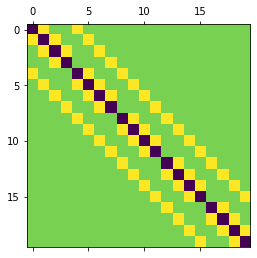

In [38]:
import matplotlib.pyplot as plt
plt.matshow(m)

Зададим вектор правой части системы 

In [39]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1

Составить функцию, вычисляющую решение системы уравнений $m x=b$ методом Зейделя с заданной точностью $\epsilon$. Прокоментировать зависимость числа итераций, требуемых для достижения заданной точности, от $\epsilon$. 

In [44]:
def m_zeid(m, b, eps):
    n = len(m)
    x = np.zeros(n)
    steps = 1
    D = np.diag(m.diagonal())
    L = np.tril(m)-D
    U = np.triu(m)-D
    while(np.linalg.norm(m@x-b)>eps):
        x = -np.linalg.inv(L + D) @ U @ x  + np.linalg.inv(L + D) @ b
        steps+=1
    return x, steps

x, steps = m_zeid(m,b,0.001)
print('x = ', x)
print('||mx-b|| = ', np.linalg.norm(m@x-b))
print('число итераций: ', steps)

x =  [0.02581072 0.05105345 0.06529589 0.03878406 0.05244542 0.11339011
 0.17154987 0.08991809 0.07088819 0.17883539 0.41781839 0.14941364
 0.05253826 0.11351592 0.17165523 0.08997263 0.02591961 0.05120101
 0.06541948 0.03884803]
||mx-b|| =  0.0008386444761439609
число итераций:  19


Чем выше точность, тем больше требуется итераций.

# Задача 6. FAST PYTHON.

Изучите документ FastPython.ipynb .
Используя Numba, сделайте ускорение циклов в методе Зейделя в задаче 5.  Сравните время работы ускоренной и неускоренной программ. 